In [3]:
#Implemetation of Linear Regression from scrath without any library function
#Author: Tushar Mittal (@techytushar)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [5]:
# Computes the Mean Squared Error
def compute_cost(W, b, X, Y):
    m = Y.shape[0]
    predictions = np.dot(X,W)+b
    cost = np.sum((predictions-Y)**2)/(2*m)
    return cost

In [6]:
# The gradient descent algo used to learn the parameters
def gradient_descent(learning_rate, W, b, X, Y):
    m = Y.shape[0]
    predictions = np.dot(X,W) + b
    error = np.sum((predictions-Y)*X, axis=0, keepdims=True)/m
    b = b - ((learning_rate*np.sum(predictions-Y))/m)
    W = W - (learning_rate*error.T)
    return W,b

In [16]:
def driver(X, Y, learning_rate = 0.5, iterations = 1500):
    # W: model parameters
    # b: intercept
    initial_b = 1
    initial_W = np.zeros((13,1))
    costs = []
    W,b = gradient_descent(learning_rate, initial_W, initial_b, X, Y)
    for i in range(iterations):
        if i%100==0:
            costs.append(compute_cost(W,b,X,Y))
        W,b = gradient_descent(learning_rate, W, b, X, Y)
    
    return costs,W,b

In [17]:
#Loading the dataset 
data = load_boston()
X = data.data
Y = data.target
# m: number of training examples
m = X.shape[0]
# n: number of features
n = X.shape[1]
Y = Y.reshape(m,1)
# appling feature scaling
scale = np.ptp(X, axis=0)
X = (X-np.average(X,axis=0))/scale

Model trained with an accuracy of 74.06360618990317%


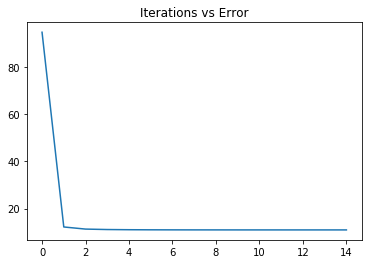

In [19]:
costs,W,b = driver(X,Y)
predict = np.dot(X,W) + b
print(f"Model trained with an accuracy of {r2_score(Y,predict)*100}%")
plt.plot(np.arange(15), costs)
plt.title("Iterations vs Error")
plt.show()